# Домашняя работа №4. Логистическая регрессия

### Работа с набором данных для задачи классификации (целевая переменная - класс объекта)

# Задание 1
#### Предварительная подготовка данных
* Заполнить пропуски в данных подходящими значениями (например, 0 для числовых значений, other для категориальных значений).
* Построить график количества значений по каждому классу.
* Построить графики распределения данных.
* Проверить датасет на дубликаты. Удалить при наличии.
* Закодировать категориальные значения. Например, создать новые булевые признаки (OneHotEncoder), или назначить число для каждого значения (LabelEncoder).
* Удалить столбцы с уникальными значениями, при наличии.
* К числовым признакам применить масштабирование со средним нулевым значением.
* Разделить на тренировочную и обучающую выборки.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('../diabetes_prediction_dataset.csv')

In [72]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

##### Удаление дубликатов

In [73]:
duplicates = data.duplicated()
duplicates.sum()

np.int64(3854)

In [74]:
data = data.drop_duplicates()

##### Построение графиков

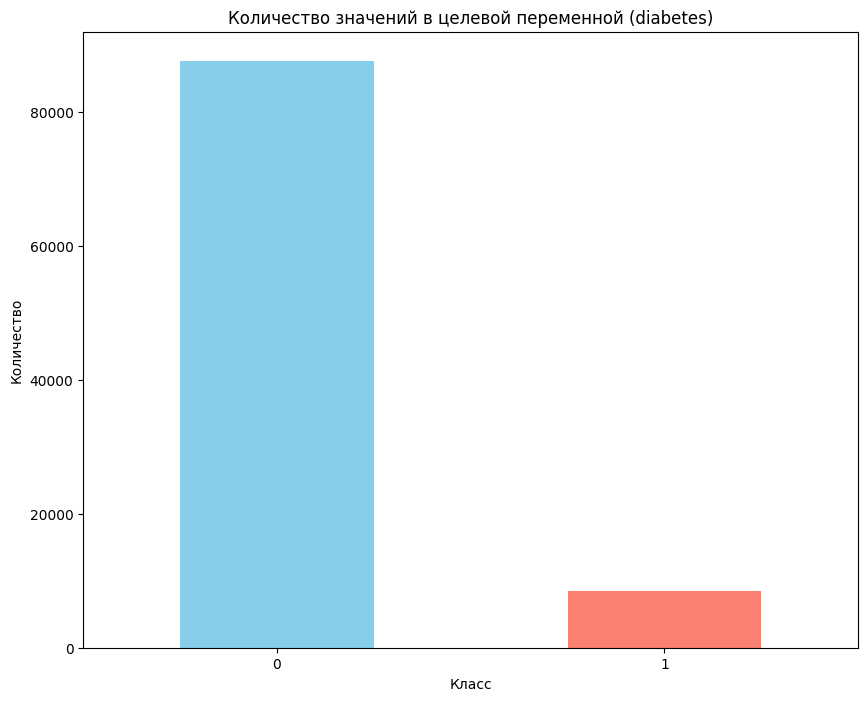

In [75]:
# график значений по классу
plt.figure(figsize=(10, 8))
data['diabetes'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Количество значений в целевой переменной (diabetes)")
plt.xticks(rotation=0)
plt.xlabel("Класс")
plt.ylabel("Количество")
plt.show()


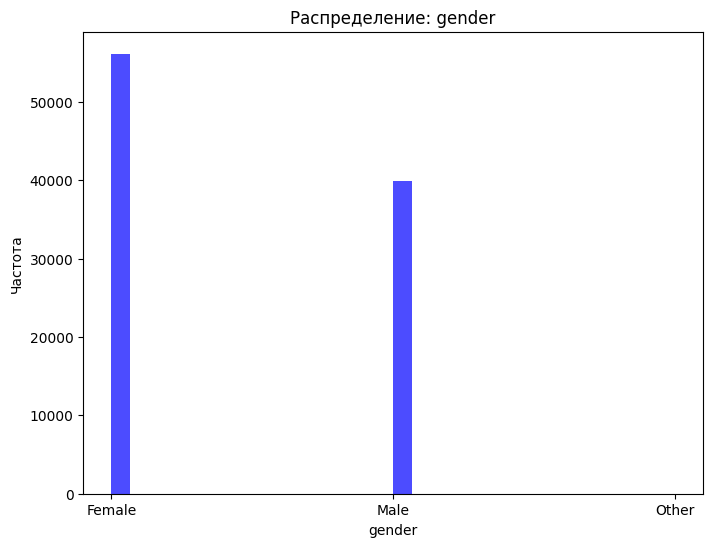

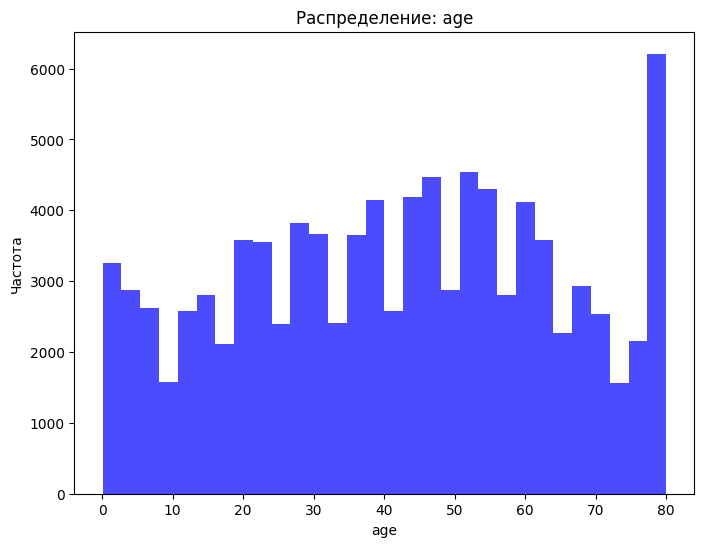

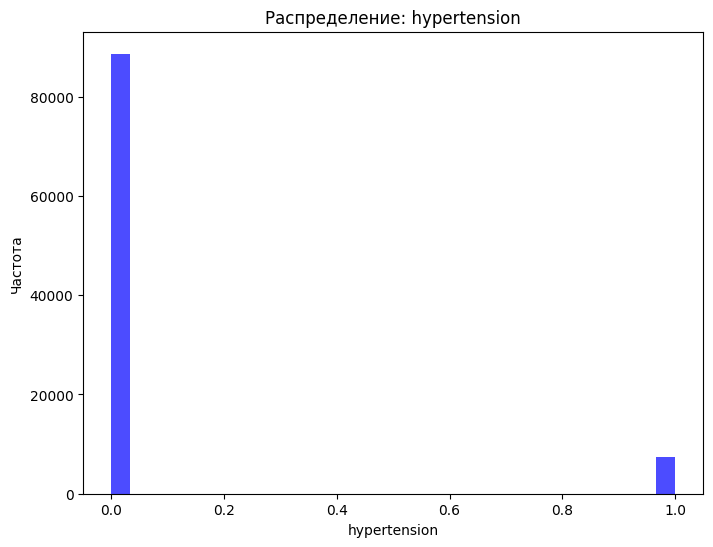

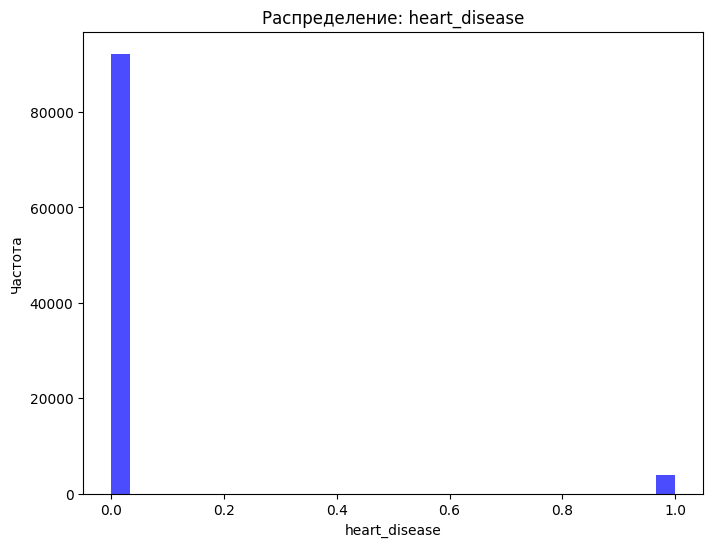

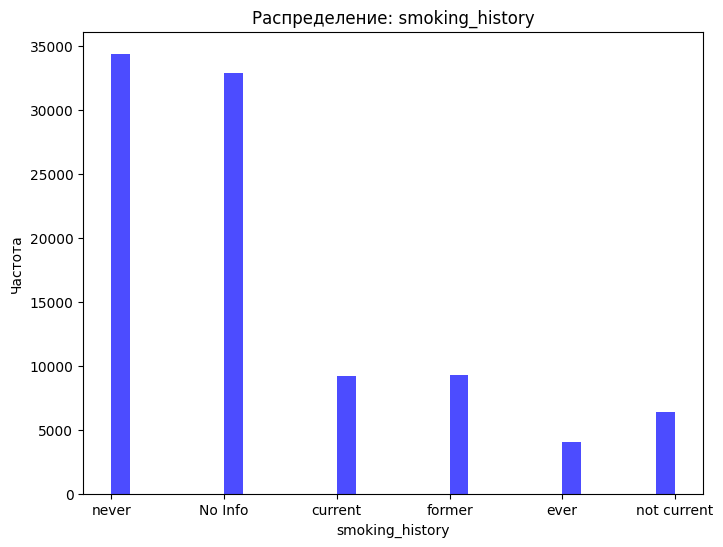

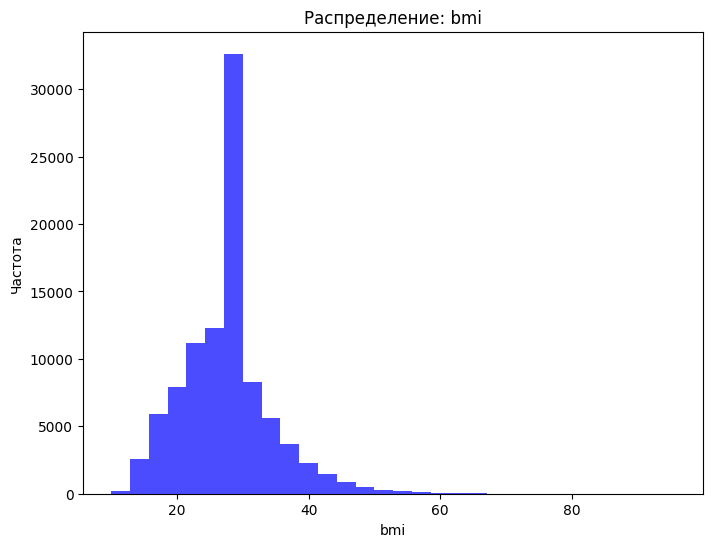

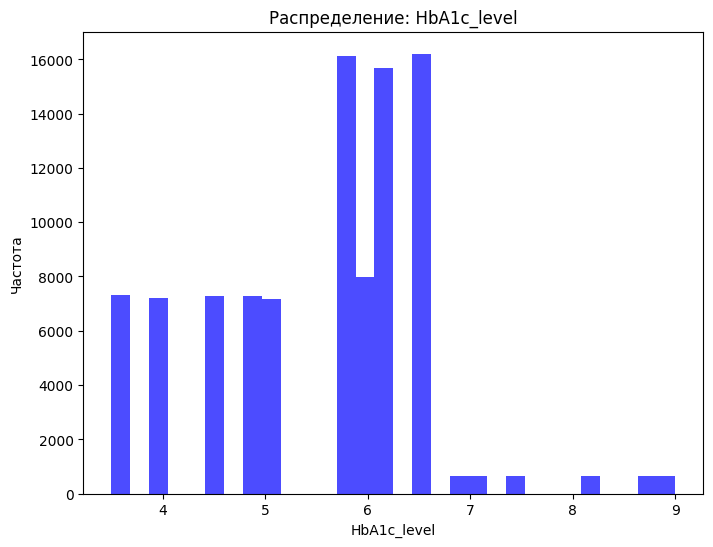

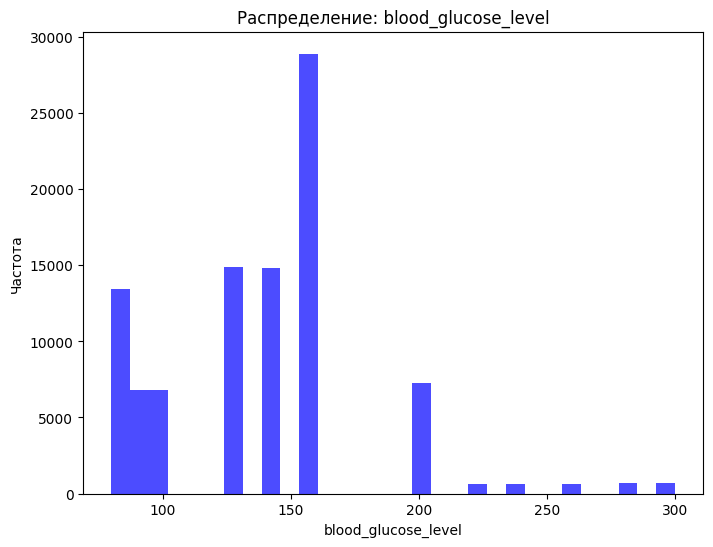

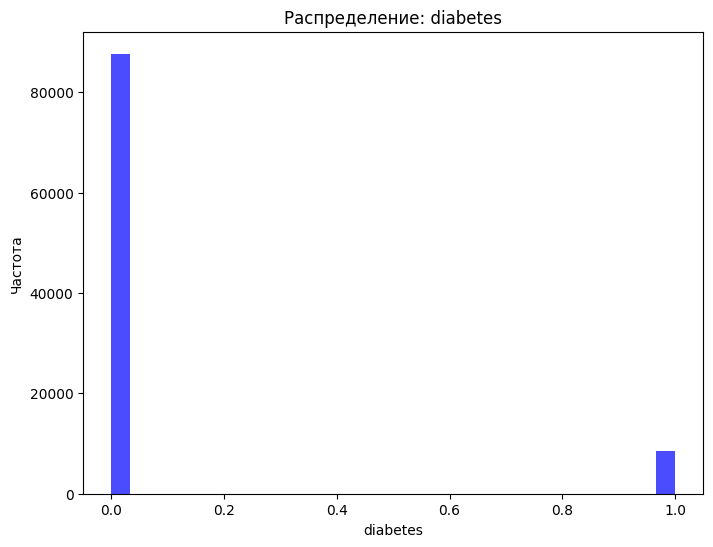

In [76]:
# график распределения данных
for column in data.columns:
    plt.figure(figsize=(8, 6))
    plt.hist(data[column], bins=30, alpha=0.7, color='blue')
    plt.title(f"Распределение: {column}")
    plt.xlabel(column)
    plt.ylabel("Частота")
    plt.show()

##### Преобразование значений

In [77]:
gender_dummies = pd.get_dummies(data['gender'], prefix='gender')
data = pd.concat([data, gender_dummies], axis=1)
data.drop('gender', axis=1, inplace=True)

In [78]:
smoking_dummies = pd.get_dummies(data['smoking_history'], prefix='smoking')
data = pd.concat([data, smoking_dummies], axis=1)
data.drop('smoking_history', axis=1, inplace=True)

##### Масштабирование

In [79]:
data.columns

Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'diabetes', 'gender_Female', 'gender_Male',
       'gender_Other', 'smoking_No Info', 'smoking_current', 'smoking_ever',
       'smoking_former', 'smoking_never', 'smoking_not current'],
      dtype='object')

In [80]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

data[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']] = scaler.fit_transform(data[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']])

##### Разделение на train и test

In [81]:
from sklearn.model_selection import train_test_split

X = data.drop('diabetes', axis=1)
y = data['diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Размер тренировочной выборки X_train: {X_train.shape}")
print(f"Размер тестовой выборки X_test: {X_test.shape}")

Размер тренировочной выборки X_train: (76916, 15)
Размер тестовой выборки X_test: (19230, 15)


# Задание 2
#### Обучение модели логистической регресии
* Обучите модель логистической регресии в Sklearn с параметрами по умолчанию.
* Вычислить метрики recall, precision, f1 на тренировочной и тестовой выборках.
* Сделать вывод о качестве обученной модели.

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, precision_score, f1_score, classification_report


model = LogisticRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)

train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)

train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

print("Метрики для тренировочной выборки:")
print(f"Recall: {train_recall:.4f}")
print(f"Precision: {train_precision:.4f}")
print(f"F1 Score: {train_f1:.4f}\n")

print("Метрики для тестовой выборки:")
print(f"Recall: {test_recall:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"F1 Score: {test_f1:.4f}\n")

# Детализированный отчет
print("Отчет классификации (тестовая выборка):")
print(classification_report(y_test, y_test_pred))

Метрики для тренировочной выборки:
Recall: 0.6322
Precision: 0.8710
F1 Score: 0.7326

Метрики для тестовой выборки:
Recall: 0.6270
Precision: 0.8543
F1 Score: 0.7232

Отчет классификации (тестовая выборка):
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     17509
           1       0.85      0.63      0.72      1721

    accuracy                           0.96     19230
   macro avg       0.91      0.81      0.85     19230
weighted avg       0.95      0.96      0.95     19230



##### Вывод

1. Точность модели (Precision):

Модель правильно классифицирует ~87% предсказанных положительных случаев.
Снижение точности на тестовой выборке минимальное (~1.6%), что свидетельствует о хорошей обобщающей способности модели.

2. Полнота модели (Recall):

Модель находит ~63% всех реальных положительных случаев в тренировочных данных.
Значение практически идентично тренировочной выборке, что говорит о стабильности модели.

3. F1-мера:

Сбалансированная оценка точности и полноты. Результат говорит о том, что модель справляется достаточно хорошо.
Незначительное снижение по сравнению с тренировочной выборкой, что также указывает на отсутствие явного переобучения.

# Задание 3
#### Настройка модели
* Обучите модель логистической регресии с подходящей для датасета и результата обучения типом регуляризации(l1, l2, elasticnet).
* Вычислить метрики полученной модели (f1, recall, precision).
* Сделать вывод о качестве обученной модели.
* Приведите график ROC-кривой.

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score, precision_score, f1_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression

def train_and_evaluate_model(Model, name, penalties):
    for penalty in penalties:
        if penalty == 'elasticnet':
            model = Model(penalty=penalty, solver='saga', l1_ratio=0.5, max_iter=1000, random_state=42)
        elif penalty:
            model = Model(penalty=penalty, solver='liblinear', max_iter=1000, random_state=42)
        else:
            model = Model(penalty=None, max_iter=1000, random_state=42) 
        
        model.fit(X_train, y_train)
        
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        f1_train = f1_score(y_train, y_train_pred)
        f1_test = f1_score(y_test, y_test_pred)
        recall_train = recall_score(y_train, y_train_pred)
        recall_test = recall_score(y_test, y_test_pred)
        precision_train = precision_score(y_train, y_train_pred)
        precision_test = precision_score(y_test, y_test_pred)
        
        results["Model"].append(name)
        results["Penalty"].append(penalty or "None")
        results["F1_Train"].append(f1_train)
        results["F1_Test"].append(f1_test)
        results["Recall_Train"].append(recall_train)
        results["Recall_Test"].append(recall_test)
        results["Precision_Train"].append(precision_train)
        results["Precision_Test"].append(precision_test)

        y_test_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_test_prob)
        roc_auc = auc(fpr, tpr)
        roc_data.append({"Model": name, "Penalty": penalty or "None", "FPR": fpr, "TPR": tpr, "AUC": roc_auc})

results = {
    "Model": [],
    "Penalty": [],
    "F1_Train": [],
    "F1_Test": [],
    "Recall_Train": [],
    "Recall_Test": [],
    "Precision_Train": [],
    "Precision_Test": []
}

roc_data = []

penalties = ['l1', 'l2', 'elasticnet', None]
train_and_evaluate_model(LogisticRegression, "LogisticRegression", penalties)

results_df = pd.DataFrame(results)
results_df


,Model,Penalty,F1_Train,F1_Test,Recall_Train,Recall_Test,Precision_Train,Precision_Test
0,LogisticRegression,l1,0.732414,0.723618,0.632155,0.627542,0.870468,0.854430
1,LogisticRegression,l2,0.732493,0.723190,0.632007,0.626961,0.870974,0.854315
2,LogisticRegression,elasticnet,0.732522,0.723618,0.632303,0.627542,0.870495,0.854430
3,LogisticRegression,None,0.732756,0.723618,0.632451,0.627542,0.870876,0.854430


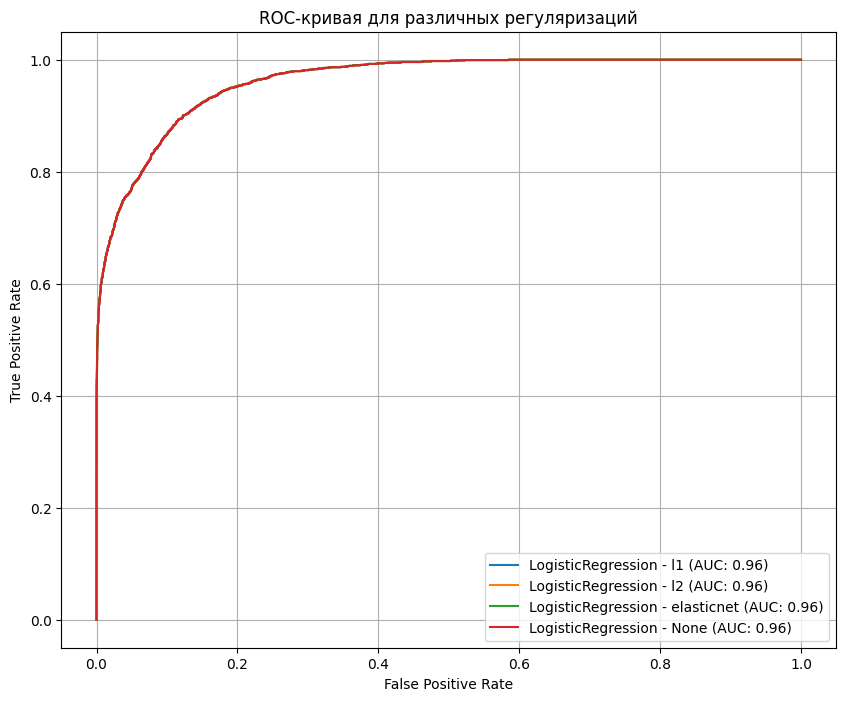

In [84]:
# Построение ROC-кривой
plt.figure(figsize=(10, 8))
for roc_entry in roc_data:
    plt.plot(roc_entry["FPR"], roc_entry["TPR"], label=f'{roc_entry["Model"]} - {roc_entry["Penalty"]} (AUC: {roc_entry["AUC"]:.2f})')

plt.title("ROC-кривая для различных регуляризаций")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.show()

##### Вывод

Все три вида регуляризации дают практически одинаковые результаты для F1-Score, Recall и Precision как на тренировочных, так и на тестовых данных.

Это указывает на то, что выбор типа регуляризации не оказывает значительного влияния в данном случае.

Сбалансированность метрик:
- Высокая Precision (~0.85) показывает, что модель редко ошибается при предсказании положительного класса.

- Достаточно высокая Recall (~0.63) говорит о том, что модель пропускает только небольшую часть положительных примеров.

- Это обеспечивает хороший F1-Score (~0.73), что свидетельствует о балансе между Precision и Recall.

Выбор лучшего метода:

Все методы показывают схожие результаты. В реальной задаче можно выбирать метод исходя из других критериев:

- Если важна интерпретация, можно использовать l1 (даёт разреженные коэффициенты).

- Если данные большие, лучше использовать elasticnet с saga.

# Задание 4
#### Настройка гиперпараметров модели.
*  Обучите модель логистической регресии с разным количеством итераций, параметром регуляризации и величной штрафа(параметр С).
* Вычислить метрики Recall, Precision, F1 на тренировочной и тестовой выборках.
* Сделать вывод о качестве обученной модели.

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, precision_score, f1_score

Cs = [0.01, 0.1, 1, 10, 100]
max_iters = [1000, 5000, 10000]

results = {
    "C": [],
    "Max_Iter": [],
    "Recall_Train": [],
    "Recall_Test": [],
    "Precision_Train": [],
    "Precision_Test": [],
    "F1_Train": [],
    "F1_Test": []
}

for C in Cs:
    for max_iter in max_iters:
        model = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, C=C, max_iter=max_iter, random_state=42)
        model.fit(X_train, y_train)
        
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        f1_train = f1_score(y_train, y_train_pred)
        f1_test = f1_score(y_test, y_test_pred)
        recall_train = recall_score(y_train, y_train_pred)
        recall_test = recall_score(y_test, y_test_pred)
        precision_train = precision_score(y_train, y_train_pred)
        precision_test = precision_score(y_test, y_test_pred)
        
        results["C"].append(C)
        results["Max_Iter"].append(max_iter)
        results["F1_Train"].append(f1_train)
        results["F1_Test"].append(f1_test)
        results["Recall_Train"].append(recall_train)
        results["Recall_Test"].append(recall_test)
        results["Precision_Train"].append(precision_train)
        results["Precision_Test"].append(precision_test)

results_df = pd.DataFrame(results)
results_df

/Users/aleksejsmolic/dev/urfu/machine_learning/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/aleksejsmolic/dev/urfu/machine_learning/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


,C,Max_Iter,Recall_Train,Recall_Test,Precision_Train,Precision_Test,F1_Train,F1_Test
0,0.01,1000,0.614850,0.615921,0.891486,0.881131,0.727766,0.725034
1,0.01,5000,0.614850,0.615921,0.891486,0.881131,0.727766,0.725034
2,0.01,10000,0.614850,0.615921,0.891486,0.881131,0.727766,0.725034
3,0.10,1000,0.630676,0.627542,0.871805,0.857143,0.731892,0.724589
4,0.10,5000,0.630676,0.627542,0.871805,0.857143,0.731892,0.724589
5,0.10,10000,0.630676,0.627542,0.871805,0.857143,0.731892,0.724589
6,1.00,1000,0.632303,0.627542,0.870495,0.854430,0.732522,0.723618
7,1.00,5000,0.632303,0.627542,0.870495,0.854430,0.732522,0.723618
8,1.00,10000,0.632303,0.627542,0.870495,0.854430,0.732522,0.723618
9,10.00,1000,0.632303,0.627542,0.870672,0.854430,0.732585,0.723618


### Вывод

Влияние гиперпараметра C (величина штрафа):

- При низком значении C (например, 0.01) наблюдается более высокий Precision (точность) на тренировочной и тестовой выборках, однако Recall (полнота) ниже. Это связано с тем, что сильная регуляризация ограничивает модель, делая её менее гибкой.

- С увеличением C (например, до 1.00, 10.00 и 100.00), Recall возрастает, а Precision немного снижается. Это указывает на то, что модель становится менее строгой, захватывает больше положительных классов, но при этом больше ошибок.

- Значения C в диапазоне от 1.00 до 10.00 дают наилучшее сочетание Recall, Precision и F1-метрик. Эти значения можно считать оптимальными для данной модели.

Количество итераций:

- Увеличение количества итераций (1000, 5000, 10000) не влияет на метрики, поскольку модель уже сходится до достижения указанного числа итераций. Это подтверждает, что текущий выбор параметра max_iter достаточен для сходимости.

- 1000 итераций достаточно до достижения сходимости.

F1-метрика:

- F1-метрика (среднее гармоническое между Recall и Precision) стабильно выше для средних значений C (например, 1.00 и 10.00). Это указывает на сбалансированное соотношение между полнотой и точностью для этих значений C.